# Imports necessary

In [1]:
import sys
sys.path.append('..')

In [2]:
from source.code.od_etl import ODETL

In [3]:
from scipy.io import arff
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# EDA

## READ DATASET

In [4]:
od_etl = ODETL(local_path='../data/datasets/')


INITIALIZING...
INITIALIZATION HAS BEEN COMPLETED


In [5]:
od_etl.get_raw_data(url='http://www.dbs.ifi.lmu.de/research/outlier-evaluation/input/ALOI.tar.gz')

ARCHIVE FILE HAS BEEN ALREADY DOWNLOADED
ARCHIVE FILE HAS BEEN ALREADY UNZIPPED


In [6]:
data = arff.loadarff('../data/datasets/ALOI_withoutdupl_norm.arff')
df = pd.DataFrame(data[0])
df.set_index('id', inplace=True)

## DATASET DESCRIPTION

In [7]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att19,att20,att21,att22,att23,att24,att25,att26,att27,outlier
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.784999,0.000018,0.0,0.000093,0.0,0.0,0.0,0.0,0.0,0.139811,...,0.048171,0.001189,0.0,0.115728,0.023449,0.0002,0.000220,0.034952,0.046914,"b""'yes'"""
2.0,0.958088,0.000000,0.0,0.001671,0.0,0.0,0.0,0.0,0.0,0.019556,...,0.000000,0.000000,0.0,0.022035,0.007516,0.0000,0.000000,0.001033,0.000000,"b""'yes'"""
3.0,0.938768,0.000000,0.0,0.005146,0.0,0.0,0.0,0.0,0.0,0.018451,...,0.000000,0.000000,0.0,0.035542,0.011982,0.0000,0.001595,0.019520,0.000000,"b""'yes'"""
4.0,0.954775,0.000000,0.0,0.001427,0.0,0.0,0.0,0.0,0.0,0.024944,...,0.000000,0.000000,0.0,0.019941,0.000805,0.0000,0.000000,0.000035,0.000000,"b""'yes'"""
5.0,0.933601,0.000000,0.0,0.001682,0.0,0.0,0.0,0.0,0.0,0.037002,...,0.000000,0.000000,0.0,0.046759,0.002663,0.0000,0.000339,0.001359,0.000000,"b""'yes'"""


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 49534 entries, 1.0 to 50000.0
Data columns (total 28 columns):
att1       49534 non-null float64
att2       49534 non-null float64
att3       49534 non-null float64
att4       49534 non-null float64
att5       49534 non-null float64
att6       49534 non-null float64
att7       49534 non-null float64
att8       49534 non-null float64
att9       49534 non-null float64
att10      49534 non-null float64
att11      49534 non-null float64
att12      49534 non-null float64
att13      49534 non-null float64
att14      49534 non-null float64
att15      49534 non-null float64
att16      49534 non-null float64
att17      49534 non-null float64
att18      49534 non-null float64
att19      49534 non-null float64
att20      49534 non-null float64
att21      49534 non-null float64
att22      49534 non-null float64
att23      49534 non-null float64
att24      49534 non-null float64
att25      49534 non-null float64
att26      49534 non-null float64
a

In [9]:
df.outlier.value_counts()

b"'no'"     48026
b"'yes'"     1508
Name: outlier, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
att1,49534.0,0.830656,0.136604,0.0,0.755428,0.868093,0.934900,1.0
att2,49534.0,0.011929,0.051645,0.0,0.000000,0.000083,0.002049,1.0
att3,49534.0,0.001878,0.024246,0.0,0.000000,0.000000,0.000000,1.0
att4,49534.0,0.005562,0.026963,0.0,0.000029,0.000389,0.002094,1.0
att5,49534.0,0.010676,0.045020,0.0,0.000000,0.000128,0.002648,1.0
att6,49534.0,0.004287,0.029679,0.0,0.000000,0.000000,0.000000,1.0
att7,49534.0,0.000182,0.005069,0.0,0.000000,0.000000,0.000000,1.0
att8,49534.0,0.001629,0.019139,0.0,0.000000,0.000000,0.000000,1.0
att9,49534.0,0.002159,0.026364,0.0,0.000000,0.000000,0.000000,1.0
att10,49534.0,0.054785,0.076228,0.0,0.006005,0.026816,0.072143,1.0


In [11]:
X = df[df.columns[0:-1]]
y = df.outlier.apply(lambda x: x == b"'yes'").apply(int)

In [12]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

## FEATURE CONNECTIONS VISUALIZATION

In [ ]:
sns.pairplot(df[df.columns[0:-1]])

[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

plt.show()

## CORRELATION COEFFICIENTS VISUALIZATION

### PEARSON

In [ ]:
sns.heatmap(df[df.columns[0:-1]].corr(method='pearson'))

[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

plt.show()

### SPEARMAN

In [ ]:
sns.heatmap(df[df.columns[0:-1]].corr(method='spearman'))

[i.set_color("green") for i in plt.gca().get_xticklabels()]
[i.set_color("green") for i in plt.gca().get_yticklabels()]

plt.show()

## DIMENSIONALITY REDUCTION

### PCA

# SOLUTION

## SUPERVISED PART

### Logistic regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.get_params()

In [ ]:
lr_params_grid = {
    'C': [1, 2, 3],
    'penalty': ['l1', 'l2']
}

In [ ]:
lr_gs = GridSearchCV(lr, param_grid=lr_params_grid, scoring='recall', verbose=10)

In [ ]:
lr_gs.fit(X_train, y_train)

### SVM

In [ ]:
svm = LinearSVC()

In [ ]:
svm.get_params()

In [ ]:
svm_params_grid = {
    'C': [1, 2, 3],
    'intercept_scaling': [1, 2, 3]
}

In [ ]:
svm_gs = GridSearchCV(svm, param_grid=svm_params_grid, scoring='recall', verbose=10)

In [ ]:
svm_gs.fit(X_train, y_train)

### KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.get_params()

In [ ]:
knn_params_grid = {
    'leaf_size': [10, 20],
    'p': [1, 2, 3],
    'n_neighbors': [5, 7]
}

In [ ]:
knn_gs = GridSearchCV(knn, param_grid=knn_params_grid, scoring='recall', verbose=10)

In [ ]:
knn_gs.fit(X_train, y_train)

## Quality metrics

### ROC-AUC

### PR-AUC

## Feature engineering

In [13]:
initial_attributes = X.columns

In [14]:
X = X.apply(lambda x: x / sum(x), axis=1)

In [15]:
X['mean_est'] = X.apply(lambda x: sum(range(1, 28) * x), axis=1)

In [16]:
X['mode'] = X[initial_attributes].apply(lambda x: x.values.argmax(), axis=1)

In [29]:
X['std_est'] = X.apply(lambda x: sum(x[initial_attributes] * (range(1, 28) - x['mean_est']) ** 2) ** 0.5, axis=1)

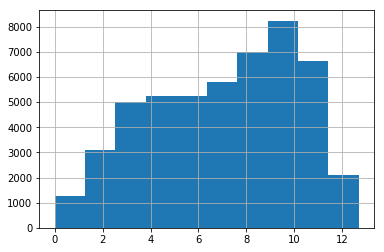

In [30]:
X.std_est.hist()

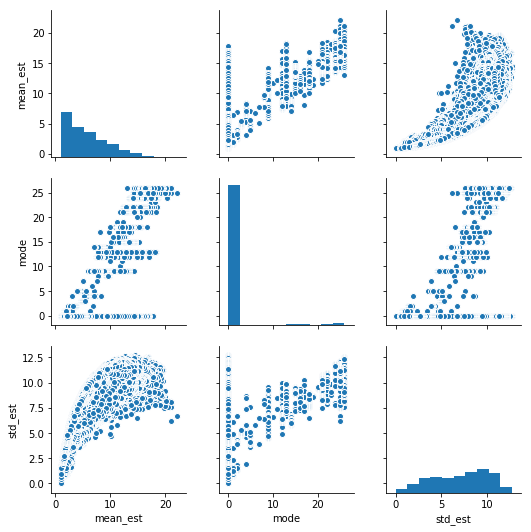

In [31]:
sns.pairplot(X[['mean_est', 'mode', 'std_est']])
plt.show()

## UNSUPERVISED PART

### DBSCAN

### One-Class SVM

### Isolation Forest

### KNN

## Quality metrics

### ARI

### MI

### AMI

### NMI

### Silhouette Coefficient

### Calinski-Harabaz Index

# CONCLUSION